In [12]:
import pandas as pd
import keras
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Conv1D
from keras.layers import Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
import json

# Exam

This problem uses the files named “salesData.csv” posted on Canvas under Final Exam and contains information on accumulative number of sales for a company in the past 3 years.
You need to use 60% of the data for training, 20% for validation, and 20% (the most recent) for test. You also need to set the seed to 9001.

---

## Reading the Data

In [2]:
df = pd.read_csv(
    filepath_or_buffer="salesData.csv"
)

## Partitioning the Data

Here, we set 60% of the data for training, 20% for validation, and the last 20% for testing the data.

In [3]:
train_portion = round(df.shape[0] * 0.6)
validation_portion = round(df.shape[0] * 0.20)
train_data = df[0:train_portion].values
validation_data = df[train_portion:train_portion+validation_portion].values
test_data = df[train_portion+validation_portion:].values

## Normalizing the Data

In [4]:
sc = MinMaxScaler(feature_range=(0,1))
train_data = train_data.reshape(-1,1)
validation_data = validation_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

Here we use the scale factor, `sc`, for re-purposing the data to fit in a range between 0 and 1.

In [5]:
sc.fit(train_data)
norm_train = sc.transform(train_data)
norm_validation = sc.transform(validation_data)
norm_test = sc.transform(test_data)

## Creating Sequences

Here we can use a function to develop sequences to train our model with.

In [6]:
def create_sequence(dataset, look_back=5, foresight=4):
    X, Y = [], []
    for i in range(len(dataset)-look_back-foresight):
        observations = dataset[i:(i+look_back), 0] # Sequence of look back
        X.append(observations)
        Y.append(dataset[i+(look_back+foresight), 0])
    return np.array(X), np.array(Y)

In [7]:
norm_train_x, norm_train_y = create_sequence(norm_train)
norm_validation_x, norm_validation_y = create_sequence(norm_validation)
norm_test_x, norm_test_y = create_sequence(norm_test)
norm_train_x = np.reshape(norm_train_x, (norm_train_x.shape[0],norm_train_x.shape[1],1))
norm_validation_x = np.reshape(norm_validation_x, (norm_validation_x.shape[0],norm_validation_x.shape[1],1))
norm_test_x = np.reshape(norm_test_x, (norm_test_x.shape[0],norm_test_x.shape[1],1))

## Developing a Model

We can use a function in order to build and compile the model used for this problem. This will make this process easier.

In [8]:
def create_model(
    norm_train_x, 
    filter_size=32, 
    dropout=0.1, 
    recurrent_dropout=0.1, 
    lstm=True
):
    model = Sequential()
    if lstm:
        model.add(
            LSTM(
                filter_size, 
                input_shape=(norm_train_x.shape[1],1), 
                dropout=dropout, 
                recurrent_dropout=recurrent_dropout
            )
        )
    else:
        model.add(
            GRU(
                filter_size, 
                input_shape=(norm_train_x.shape[1],1), 
                dropout=dropout, 
                recurrent_dropout=recurrent_dropout
            )
        )
    model.add(
        Dense(
            1, 
            activation="linear"
        )
    )
    model.compile(
        loss="mae", 
        optimizer="adam",
        metrics=["mean_absolute_error"]
    )
    return model

In [25]:
def create_conv_model(
    norm_train_x, 
    filter_size=32, 
    dropout=0.1, 
    recurrent_dropout=0.1, 
    lstm=True
):
    model = Sequential()
    model.add(
        Conv1D(
            filter_size,
            input_shape=(norm_test_x.shape[1],1),
            kernel_size=3,
            padding="same"
        )
    )
    if lstm:
        model.add(
            LSTM(
                filter_size, 
                input_shape=(norm_train_x.shape[1],1), 
                dropout=dropout, 
                recurrent_dropout=recurrent_dropout
            )
        )
    else:
        model.add(
            GRU(
                filter_size, 
                input_shape=(norm_train_x.shape[1],1), 
                dropout=dropout, 
                recurrent_dropout=recurrent_dropout
            )
        )
    model.add(
        Dense(
            1, 
            activation="linear"
        )
    )
    model.compile(
        loss="mae", 
        optimizer="adam",
        metrics=["mean_absolute_error"]
    )
    return model

## Training the Model

In [10]:
models = []
for lstm in [True, False]:
    for filter_size in [32, 64]:

        for dropout in [0.1, 0.3, 0.6, 0.9]:
            print("tyler")
            for recurrent_dropout in [0.1, 0.3, 0.6, 0.9]:
                model = create_model(
                    norm_train_x, 
                    filter_size=filter_size, 
                    dropout=dropout, 
                    recurrent_dropout=recurrent_dropout, 
                    lstm=lstm
                )
                conv_model = create_conv_model(
                    norm_train_x, 
                    filter_size=filter_size, 
                    dropout=dropout, 
                    recurrent_dropout=recurrent_dropout, 
                    lstm=lstm
                )
                history = model.fit(
                    norm_train_x, 
                    norm_train_y,
                    validation_data=(
                        norm_validation_x,
                        norm_validation_y
                    ),
                    epochs=100,
                    batch_size=64,
                    callbacks=[],
                    verbose=0
                )
                history = conv_model.fit(
                    norm_train_x, 
                    norm_train_y,
                    validation_data=(
                        norm_validation_x,
                        norm_validation_y
                    ),
                    epochs=100,
                    batch_size=64,
                    callbacks=[],
                    verbose=0
                )
                models.append({
                    "LSTM":lstm,
                    "Filter_Size":filter_size,
                    "Dropout":dropout,
                    "Recurrent_dropout":recurrent_dropout,
                    "Test_acc":model.evaluate(norm_test_x, norm_test_y, verbose=0)[1],
                    "conv":False
                })
                models.append({
                    "LSTM":lstm,
                    "Filter_Size":filter_size,
                    "Dropout":dropout,
                    "Recurrent_dropout":recurrent_dropout,
                    "Test_acc":conv_model.evaluate(norm_test_x, norm_test_y, verbose=0)[1],
                    "conv":True
                })

tyler
tyler
tyler
tyler
tyler
tyler
tyler
tyler
tyler
tyler
tyler
tyler
tyler
tyler
tyler
tyler


In [13]:
model_dict = {"models":models}
with open('models.json', 'w') as fp:
    json.dump(model_dict, fp)

In [16]:
conv_acc = [model["Test_acc"] for model in models if model["conv"] and not model["LSTM"]]
conv_best_acc = max(conv_acc)
best_conv = models[i for i, j in enumerate(conv_acc) if j == conv_best_acc]
# gru_best_acc = max([model["Test_acc"] for model in models if not model["conv"]])
# best_gru = models[i for i, j in enumerate([model["Test_acc"] for model in models if not model["conv"]]) if j == gru_best_acc]

SyntaxError: invalid syntax (<ipython-input-16-a8f463c6c7ce>, line 3)

In [21]:
a = [model["Test_acc"] for model in models if not model["conv"] and not model["LSTM"]]
m = max(a)
models[[i for i, j in enumerate(a) if j == m][0]]

{'LSTM': True,
 'Filter_Size': 32,
 'Dropout': 0.9,
 'Recurrent_dropout': 0.9,
 'Test_acc': 0.19537723064422607,
 'conv': False}

## Conclusion

I based my model on the evaluate method that Keras provides in each model. The models with the highest accuracy on the test data were chosen.

### GRU

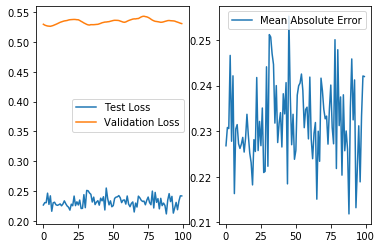

In [24]:
model = create_model(
                    norm_train_x, 
                    filter_size=32, 
                    dropout=0.1, 
                    recurrent_dropout=0.1, 
                    lstm=True
                )
history = conv_model.fit(
                    norm_train_x, 
                    norm_train_y,
                    validation_data=(
                        norm_validation_x,
                        norm_validation_y
                    ),
                    epochs=100,
                    batch_size=64,
                    callbacks=[],
                    verbose=0
                )
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Test Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history["mean_absolute_error"], label="Mean Absolute Error")
plt.legend()
plt.show()

### 1D-Conv

In [26]:
model = create_conv_model(
                    norm_train_x, 
                    filter_size=32, 
                    dropout=0.9, 
                    recurrent_dropout=0.9, 
                    lstm=True
                )

plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Test Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history["mean_absolute_error"], label="Mean Absolute Error")
plt.legend()
plt.show()

ValueError: Input 0 is incompatible with layer gru_67: expected ndim=3, found ndim=2